# tradeView PivotHigh

In [1]:
"""枢轴点 最高价"""


def PivotHigh(df, left, right=0):
    right = right if right else left
    df['pivot'] = 0.0
    for i in range(len(df)):
        if i >= left + right:
            # print(df['high'][i - right - left:i + 1].values)
            rolling = df['high'][i - right - left:i + 1].values
            m = max(rolling)
            # print(GetTime(df['Time'][i], "%m-%d %H:%M"), df['High'][i-right], m, rolling)
            if df['high'][i - right] == m:
                df['pivot'].values[i] = m
    return df['pivot']


"""枢轴点 最低价"""


def PivotLow(df, left, right=0):
    right = right if right else left
    df['rollingLow'] = df['low'].rolling(left + right).min()
    df['pivot'] = 0.0
    for i in range(len(df)):
        if i >= left + right:
            rolling = df['low'][i - right - left:i + 1].values
            m = min(rolling)
            if df['low'][i - right] == m:
                df['pivot'].values[i] = m
    
    return df['pivot']

In [2]:
# import pandas as pd

import tushare as ts
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
%matplotlib widget
import sys
sys.path.append("../../")
import JSONData.tdx_data_Day as tdd

# df = pd.DataFrame(r) #r为K线数据
code = '000002'
# df = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)

df = ts.get_hist_data(code, start='2022-12-01').sort_index(ascending=True)
df[-1:]

df['PivotHigh'] = PivotHigh(df.copy(), 5, 5)
df['PivotLow'] = PivotLow(df.copy(), 5, 5)
df[df['PivotHigh'] > 0]['PivotHigh']
df[df['PivotLow'] > 0]['PivotLow']

date
2023-01-10    17.88
2023-02-24    17.08
2023-02-27    17.08
2023-03-23    15.58
2023-04-13    15.00
2023-05-08    14.55
2023-06-06    13.67
2023-07-03    13.70
2023-07-25    13.56
2023-09-01    13.05
2023-10-27    11.35
2023-11-10    11.07
2023-11-27    11.55
Name: PivotLow, dtype: float64

In [3]:
a,b,c = 1,2,3
# a ? b : 'na'
# variable = exper ? b : c;即：如果exper表达式的值为true则variable = b，否则，variable = c

<AxesSubplot:xlabel='date'>

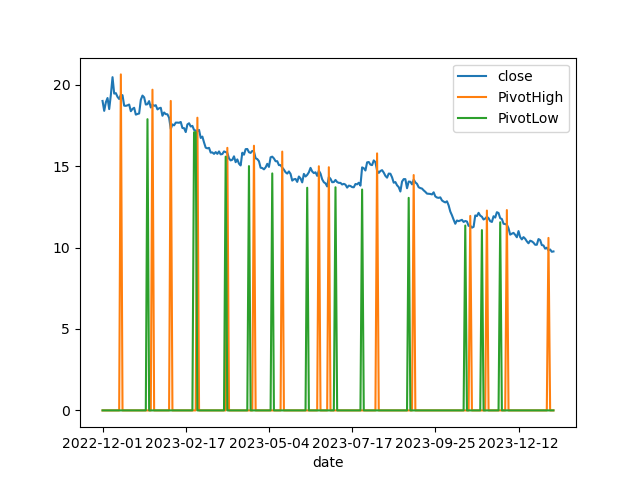

In [4]:
# df['PivotHigh']
df.loc[:,['close','PivotHigh','PivotLow']].plot()

# boll 双均线
作者：苏慕白
链接：https://zhuanlan.zhihu.com/p/447240848
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [5]:


seting = {'name': 'BBv3', 'symbol': 'BTCUSDT', 'kTime': '15m', 'bb_len': 7,
          'buy_len': 44, 'buy_mult': 2.664, 'sell_len': 20, 'sell_mult': 2.54,
          'buy': 1, 'buyZhiying': 12.704, 'buyZhisun': 7.525, 'sell': 1,
          'sellZhiying': 6.112, 'sellZhisun': 1.52}

"""
布林带升级版定向策略
"""


def BBv3(r, df, seting):
    df['ma'] = SMA(r, seting['bb_len'], 'Close')

    df['upper'] = df['ma'] + seting['sell_mult'] * \
        talib.STDDEV(df['Close'], timeperiod=seting['sell_len'])
    df['lower'] = df['ma'] - seting['buy_mult'] * \
        talib.STDDEV(df['Close'], timeperiod=seting['buy_len'])

    c = len(df)
    for i in range(c):
        if i > seting['sell_len'] and i + 1 < c:
            if df['Close'][i] > df['lower'][i] and df['Close'][
                    i - 1] < df['lower'][
                    i - 1]:  # and df['Close'][i] > df['ma2'][i]
                df['side'].values[i] = 'BUY'

            if df['Close'][i] < df['upper'][i] and df['Close'][
                    i - 1] > df['upper'][
                    i - 1]:  # and df['Close'][i] < df['ma2'][i]
                df['side'].values[i] = 'SELL'

    return df

'\n布林带升级版定向策略\n'

# tradingview-ta的Python项目
https://pypi.org/search/?q=tradingview&o=

In [6]:
from tradingview_ta import Interval, TA_Handler

tesla = TA_Handler()
tesla.set_symbol_as("TSLA")
tesla.set_exchange_as_crypto_or_stock("NASDAQ")
tesla.set_screener_as_stock("america")
tesla.set_interval_as(Interval.INTERVAL_1_DAY)
print(tesla.get_analysis().summary)
# Example output: {"RECOMMENDATION": "BUY", "BUY": 8, "NEUTRAL": 6, "SELL": 3}

ModuleNotFoundError: No module named 'tradingview_ta'

In [ ]:
import talib as ta

ta.pivotlow()

In [ ]:
from pyalgotrade import strategy
from pyalgotrade.bar import Frequency
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import macd


class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(MyStrategy, self).__init__(feed)
        self.__instrument = instrument
        self.__macd = macd.MACD(
            feed[instrument].getCloseDataSeries(),
            12, 26, 9)

    def onBars(self, bars):
        macdValue = self.__macd[-1]
        signalValue = self.__macd.getSignal()[-1]
        if macdValue > signalValue and self.__macd[-2] < self.__macd.getSignal()[-2]:
            self.info("Buy %s" % (bars[self.__instrument].getClose()))
        elif macdValue < signalValue and self.__macd[-2] > self.__macd.getSignal()[-2]:
            self.info("Sell %s" % (bars[self.__instrument].getClose()))


feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "orcl-2000.csv")

strategy = MyStrategy(feed, "orcl")
strategy.run()

# macd的相邻的两个下降趋势作为背离信号
两个相邻的上升趋势也作为背离信号的策略代码如和写

In [ ]:
from pyalgotrade import strategy
from pyalgotrade.bar import Frequency
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import macd


class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(MyStrategy, self).__init__(feed)
        self.__instrument = instrument
        self.__macd = macd.MACD(
            feed[instrument].getCloseDataSeries(),
            12, 26, 9)
        self.__macdTrend = None

    def onBars(self, bars):
        macdValue = self.__macd[-1]
        signalValue = self.__macd.getSignal()[-1]
        # Determine the current trend
        if macdValue > signalValue:
            currentTrend = "up"
        else:
            currentTrend = "down"

        # Check for a change in trend
        if self.__macdTrend is None:
            self.__macdTrend = currentTrend
        elif self.__macdTrend != currentTrend:
            self.__macdTrend = currentTrend
            if currentTrend == "up":
                self.info("Buy %s" % (bars[self.__instrument].getClose()))
            elif currentTrend == "down":
                self.info("Sell %s" % (bars[self.__instrument].getClose()))


feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "orcl-2000.csv")

strategy = MyStrategy(feed, "orcl")
strategy.run()